In [13]:
import anndata
import scvelo as scv
import pandas as pd
import numpy as np
import matplotlib as plt
import scanpy as sc
import cellrank as cr
from importlib_metadata import version, PackageNotFoundError

scv.logging.print_version()
scv.settings.presenter_view = True
scv.settings.set_figure_params('scvelo')
scv.settings.verbosity = 3
cr.settings.verbosity = 2

Running scvelo 0.2.5 (python 3.7.12) on 2023-12-11 16:09.


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [5]:
# import output file from velocyto, filtered to keep only monocytes and macrophages
merge = anndata.read(filename='anndata.merge_MONOMACRO_velocyto_SUBSET.hdf5')

In [6]:
merge.obs.index

Index(['Tumor_d10_AAAGAACGTTTGAACC-1', 'Tumor_d10_AAACCCATCAAACGAA-1',
       'Tumor_d10_AAAGGATAGTCGCTAT-1', 'Tumor_d10_AAAGAACCAAGTATCC-1',
       'Tumor_d10_AAAGGATCATGTGGTT-1', 'Tumor_d10_AAAGAACTCCATGCAA-1',
       'Tumor_d10_AAACGAACACTGTGTA-1', 'Tumor_d10_AAAGAACAGTATCCTG-1',
       'Tumor_d10_AAACGCTTCTATGTGG-1', 'Tumor_d10_AAAGGATGTGCCCACA-1',
       ...
       'Healthy_Blood_3_TGTTCATAGACCAAGC-1',
       'Healthy_Blood_3_TGTAAGCGTAGGAGGG-1',
       'Healthy_Blood_3_TTCCTCTGTGACAACG-1',
       'Healthy_Blood_3_TTCGGTCTCTACCCAC-1',
       'Healthy_Blood_3_TTCACGCGTGCAGATG-1',
       'Healthy_Blood_3_TTTATGCAGCTGCGAA-1',
       'Healthy_Blood_3_TTTGATCTCTATACGG-1',
       'Healthy_Blood_3_TTGCATTAGCTTCGTA-1',
       'Healthy_Blood_3_TTTAGTCCAAACACCT-1',
       'Healthy_Blood_3_TTTCACACAAGTACCT-1'],
      dtype='object', length=10140)

In [7]:
tsne = pd.read_csv('tsne.csv', index_col=0) # load tsne embedding computed with Palantir
tsne

,x,y
Tumor_d10_AAACCCACACTTGAAC-1,-4.038845,16.511250
Tumor_d10_AAACCCAGTGTTATCG-1,2.024103,-20.056960
Tumor_d10_AAACCCATCAAACGAA-1,-3.850606,-16.910548
Tumor_d10_AAACGAACACTGTGTA-1,-6.036947,-22.573072
Tumor_d10_AAACGCTAGGCTTTCA-1,8.758355,-17.924150
...,...,...
Healthy_Blood_3_TTGCATTAGCTTCGTA-1,11.594573,31.710137
Healthy_Blood_3_TTTAGTCCAAACACCT-1,31.096801,-14.413259
Healthy_Blood_3_TTTATGCAGCTGCGAA-1,33.366374,-7.908490
Healthy_Blood_3_TTTCACACAAGTACCT-1,33.531307,-10.110671


In [8]:
cluster = pd.read_csv('annotated_clusters.csv', index_col=0) # load cell annotation
cluster = cluster.rename(columns={'x':'clusters_refined'})
cluster

,clusters_refined
Tumor_d10_AAACCCACACTTGAAC-1,Il1b+ TAMs
Tumor_d10_AAACCCAGTGTTATCG-1,Clps+ mac
Tumor_d10_AAACCCATCAAACGAA-1,Il1b+ TAMs
Tumor_d10_AAACGAACACTGTGTA-1,Il1b+ TAMs
Tumor_d10_AAACGCTAGGCTTTCA-1,Folr2+ TAMs
...,...
Healthy_Blood_3_TTGCATTAGCTTCGTA-1,Classical_Mono
Healthy_Blood_3_TTTAGTCCAAACACCT-1,Classical_Mono
Healthy_Blood_3_TTTATGCAGCTGCGAA-1,Classical_Mono
Healthy_Blood_3_TTTCACACAAGTACCT-1,Classical_Mono


In [9]:
tissue = pd.read_csv('tissue_annotation.csv', index_col=0) # load tissue annotation
tissue

,Tissue
Tumor_d10_AAACCCACACTTGAAC-1,Tumor
Tumor_d10_AAACCCAGTGTTATCG-1,Tumor
Tumor_d10_AAACCCATCAAACGAA-1,Tumor
Tumor_d10_AAACGAACACTGTGTA-1,Tumor
Tumor_d10_AAACGCTAGGCTTTCA-1,Tumor
...,...
Healthy_Blood_3_TTGCATTAGCTTCGTA-1,Blood
Healthy_Blood_3_TTTAGTCCAAACACCT-1,Blood
Healthy_Blood_3_TTTATGCAGCTGCGAA-1,Blood
Healthy_Blood_3_TTTCACACAAGTACCT-1,Blood


In [18]:
ad=merge[np.isin(merge.obs.index, tsne.index)]
tsne = tsne.loc[ad.obs.index,:]
cluster = cluster.loc[ad.obs.index,:]
tissue = tissue.loc[ad.obs.index,:]
ad.obs['cluster'] = cluster.values
ad.obs['tissue'] = tissue.values
ad.obsm['X_tsne'] = tsne.values
ad

/opt/common/tools/ric.tiget/mambaforge/envs/Ostuni_scVelo/lib/python3.7/site-packages/ipykernel_launcher.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  """


AnnData object with n_obs × n_vars = 10140 × 32285
    obs: 'batch', 'cluster', 'tissue'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    obsm: 'X_tsne', 'X_umap'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [22]:
ad.obs['cluster'] = ad.obs['cluster'].astype('category')
ad.obs['tissue'] = ad.obs['tissue'].astype('category')

In [11]:
np.allclose(np.ravel(ad.X[:5].data) % 1, 0, atol=1e-3)

True

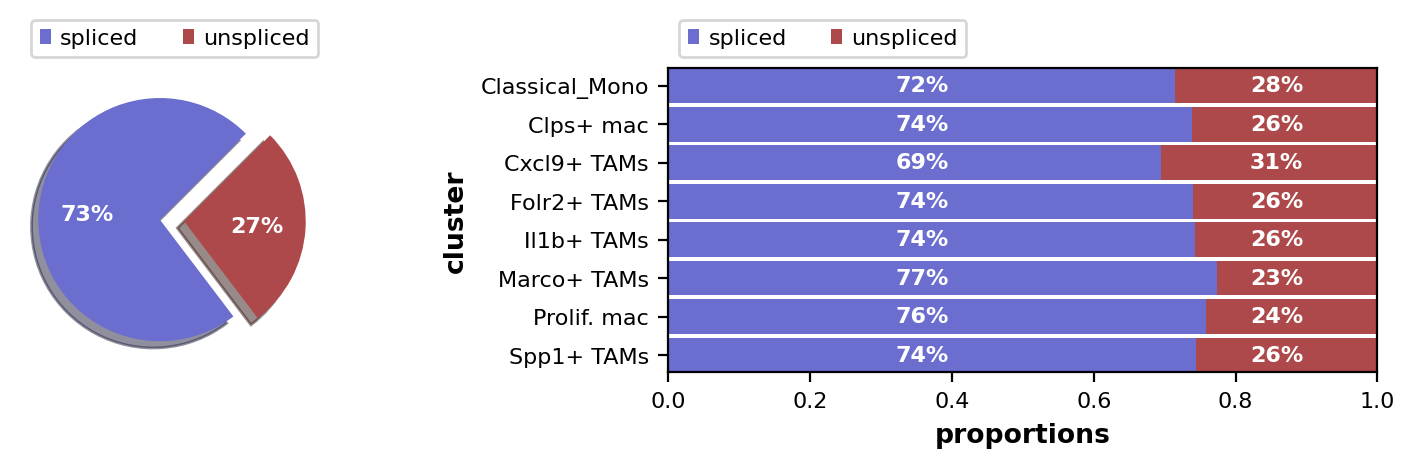

In [23]:
scv.pl.proportions(ad,groupby='cluster')

In [25]:
scv.pp.filter_and_normalize(ad, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(ad, n_pcs=25, n_neighbors=30)
scv.tl.recover_dynamics(ad)
scv.tl.velocity(ad, mode = 'dynamical')
scv.tl.velocity_graph(ad)

Filtered out 23812 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/72 cores)


/opt/common/tools/ric.tiget/mambaforge/envs/Ostuni_scVelo/lib/python3.7/site-packages/scvelo/tools/dynamical_model.py:721: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.alpha, dm.beta, dm.gamma, dm.pars[:3]]) / dm.m[-1]
/opt/common/tools/ric.tiget/mambaforge/envs/Ostuni_scVelo/lib/python3.7/site-packages/scvelo/tools/dynamical_model.py:724: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([dm.t, dm.tau, dm.t_, dm.pars[4]]) * dm.m[-1]


    finished (0:13:01) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:07) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/72 cores)


/opt/common/tools/ric.tiget/mambaforge/envs/Ostuni_scVelo/lib/python3.7/site-packages/scvelo/core/_parallelize.py:138: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  res = np.array(res) if as_array else res


    finished (0:00:21) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


saving figure to file ./figures/scvelo_Velocity_MonoMacro_dynamical_TSNEMNN.svg


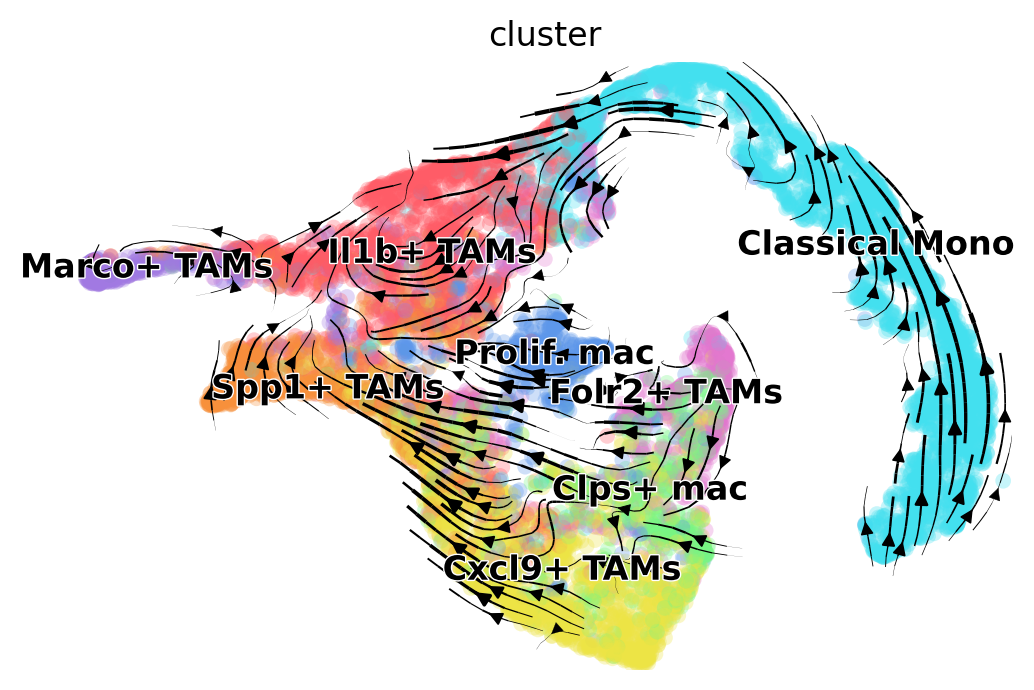

saving figure to file ./figures/scvelo_Tissue_Velocity_MonoMacro_dynamical_TSNEMNN.svg


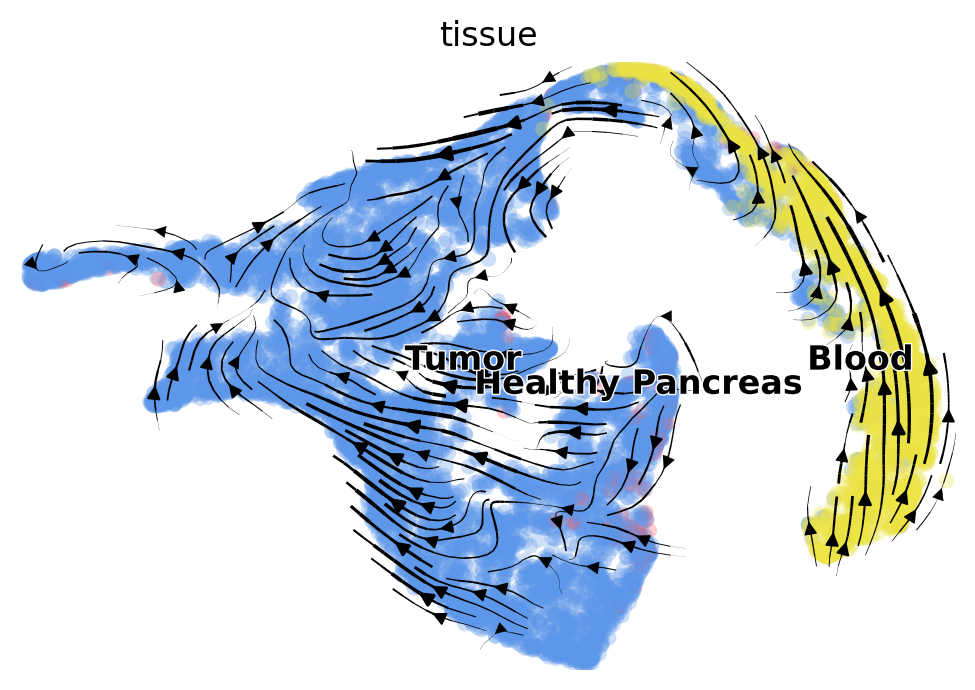

In [30]:
scv.pl.velocity_embedding_stream(ad, basis='tsne', color='cluster',save='Velocity_MonoMacro_dynamical_TSNEMNN.svg',palette=['#43e0efff',"#78f785ff","#ede445ff","#e378d0ff","#ff5c67ff","#a179e2ff","#5d97eaff","#f7903bff"])
scv.pl.velocity_embedding_stream(ad, basis='tsne', color='tissue',save='Tissue_Velocity_MonoMacro_dynamical_TSNEMNN.svg',palette=["#ede445ff",'#ff5c67ff',"#5d97eaff"])

In [31]:
from cellrank.tl.kernels import VelocityKernel
from cellrank.tl.kernels import ConnectivityKernel
vk = VelocityKernel(ad)
vk.compute_transition_matrix()
ck = ConnectivityKernel(ad).compute_transition_matrix()
combined_kernel = 0.8 * vk + 0.2 * ck
print(combined_kernel)

Computing transition matrix based on logits using `'deterministic'` mode
Estimating `softmax_scale` using `'deterministic'` mode


100%|████████████████████████████████████████████████████████████████████████████████| 10140/10140 [00:17<00:00, 584.12cell/s]

Setting `softmax_scale=5.3414`



100%|████████████████████████████████████████████████████████████████████████████████| 10140/10140 [00:10<00:00, 983.21cell/s]


    Finish (0:00:28)
Computing transition matrix based on `adata.obsp['connectivities']`
    Finish (0:00:00)
((0.8 * <VelocityKernel[softmax_scale=5.34, mode=deterministic, seed=44219, scheme=<CorrelationScheme>]>) + (0.2 * <ConnectivityKernel[dnorm=True, key=connectivities]>))


In [32]:
from cellrank.tl.estimators import GPCCA
g = GPCCA(combined_kernel)
print(g)

GPCCA[n=10140, kernel=((0.8 * <VelocityKernel[softmax_scale=5.34, mode=deterministic, seed=44219, scheme=<CorrelationScheme>]>) + (0.2 * <ConnectivityKernel[dnorm=True, key=connectivities]>))]


Computing Schur decomposition
When computing macrostates, choose a number of states NOT in `[4, 9, 13, 16, 19]`
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:08:38)


AttributeError: 'GPCCA' object has no attribute 'plot_schur'

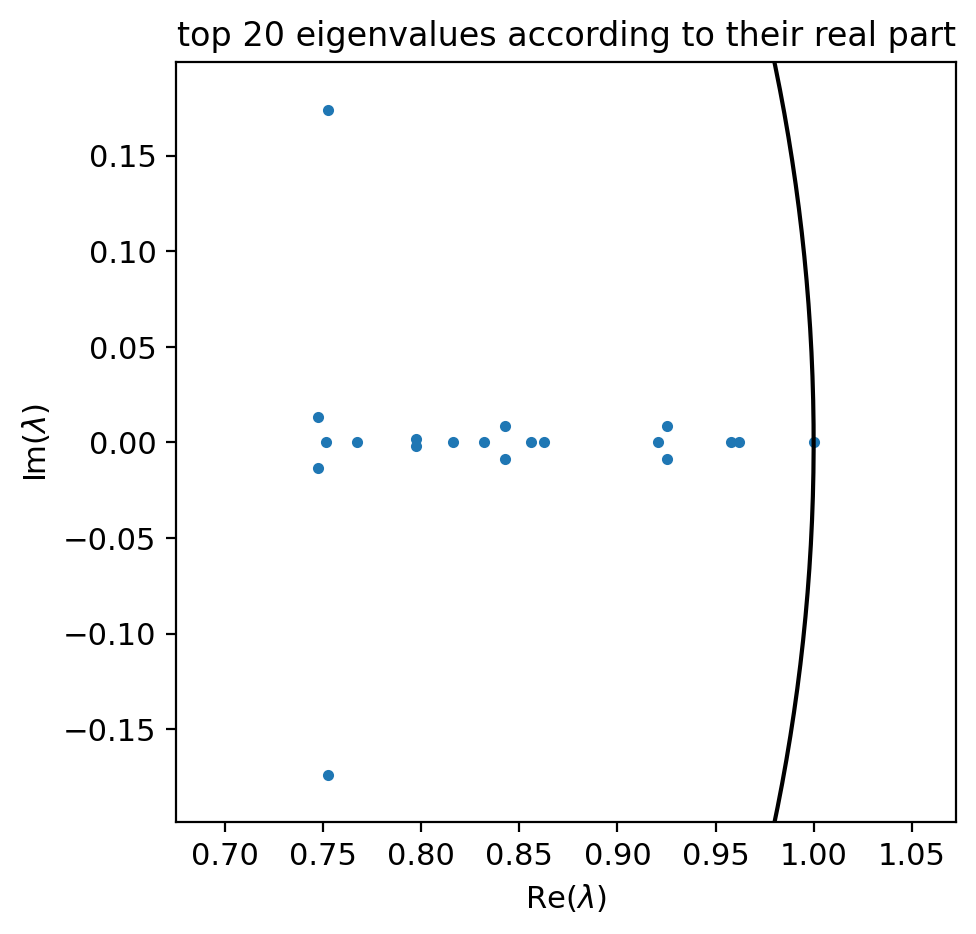

In [33]:
g.compute_schur(n_components=20)
g.plot_spectrum()
g.plot_schur(basis='tsne',use=10, ncols=3)

Computing `6` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:18)


Classical_Mono_1,Classical_Mono_2,Marco+ TAMs,Classical_Mono_3,Il1b+ TAMs,Cxcl9+ TAMs
0.001113,0.000455,0.029564,0.148492,0.045920,0.774457
0.000952,0.000851,0.032204,0.156505,0.063808,0.745681
0.000672,0.000854,0.217089,0.161992,0.092267,0.527126
0.002173,0.016779,0.022883,0.514372,0.017736,0.426057
0.000641,0.000305,0.168855,0.146635,0.228066,0.455497
0.000892,0.000371,0.068229,0.151959,0.115191,0.663359
0.001017,0.000337,0.044265,0.150985,0.072207,0.731189
0.000512,0.001059,0.011338,0.174830,0.126642,0.685619
0.000539,0.000320,0.223890,0.145226,0.276262,0.353763
0.000848,0.002862,0.031692,0.218163,0.033768,0.712666


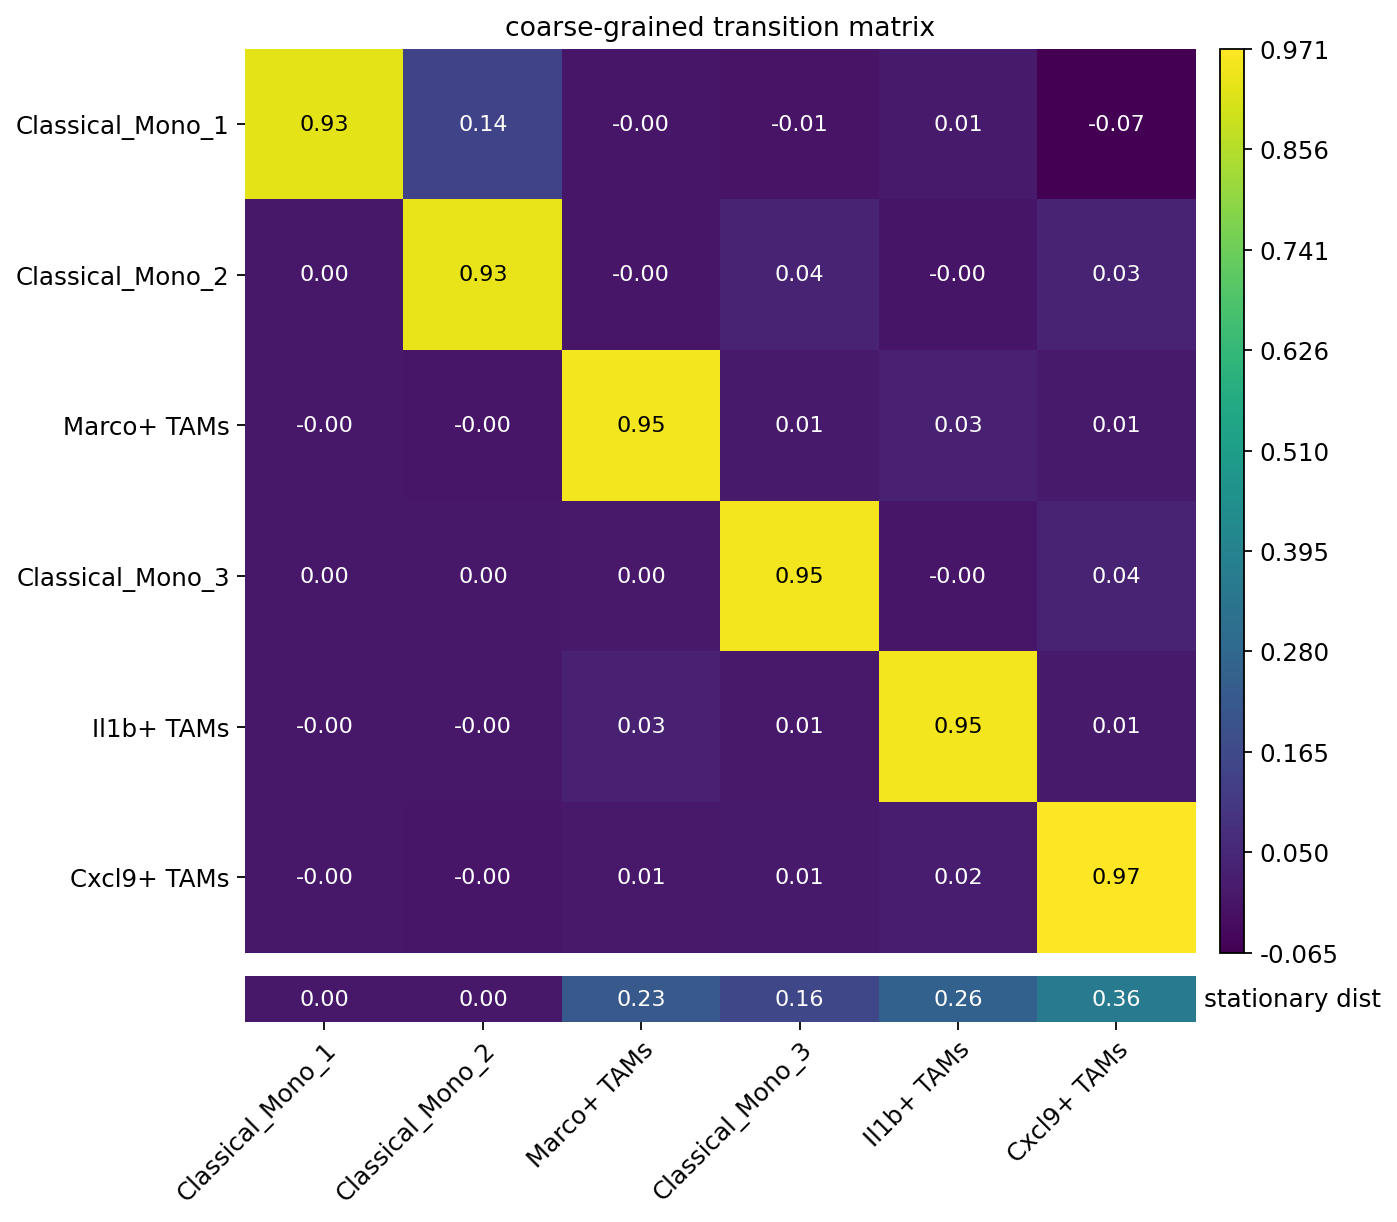

In [34]:
g.compute_macrostates(n_states=6, cluster_key="cluster")
g.plot_coarse_T(text_kwargs={"fontsize": 10})
g.macrostates_memberships

saving figure to file ./figures/scvelo_Macrostates_TSNE.pdf


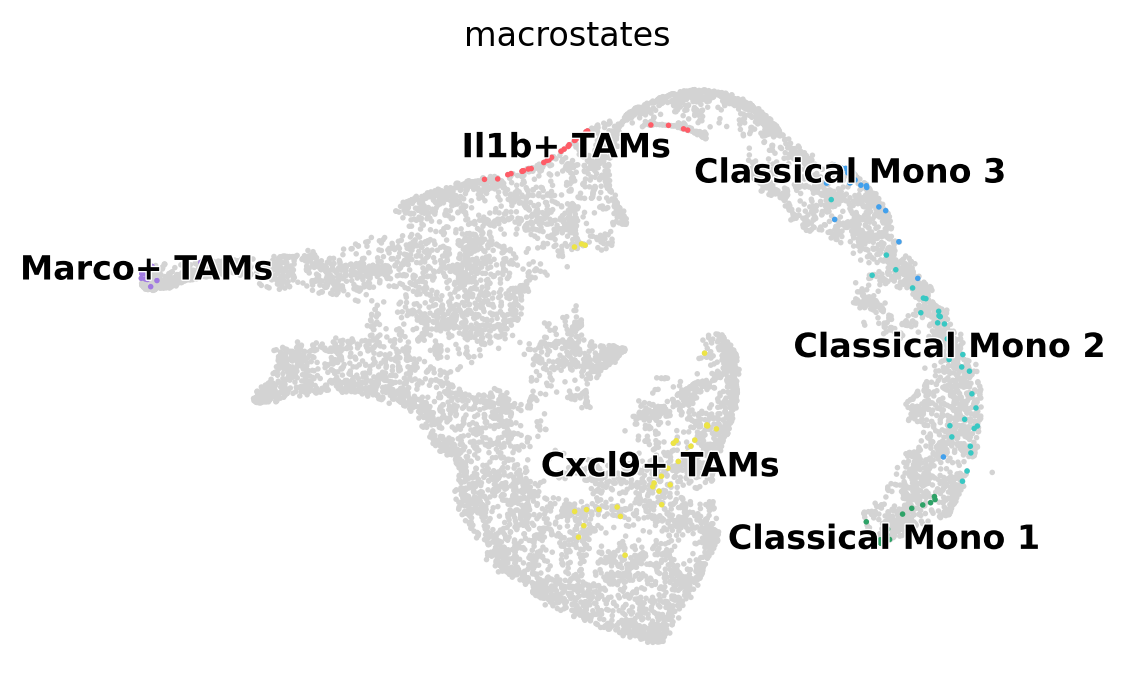

Adding `adata.obs['terminal_states']`
       `adata.obs['terminal_states_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`
saving figure to file ./figures/scvelo_All_Terminal_states_TSNE.pdf


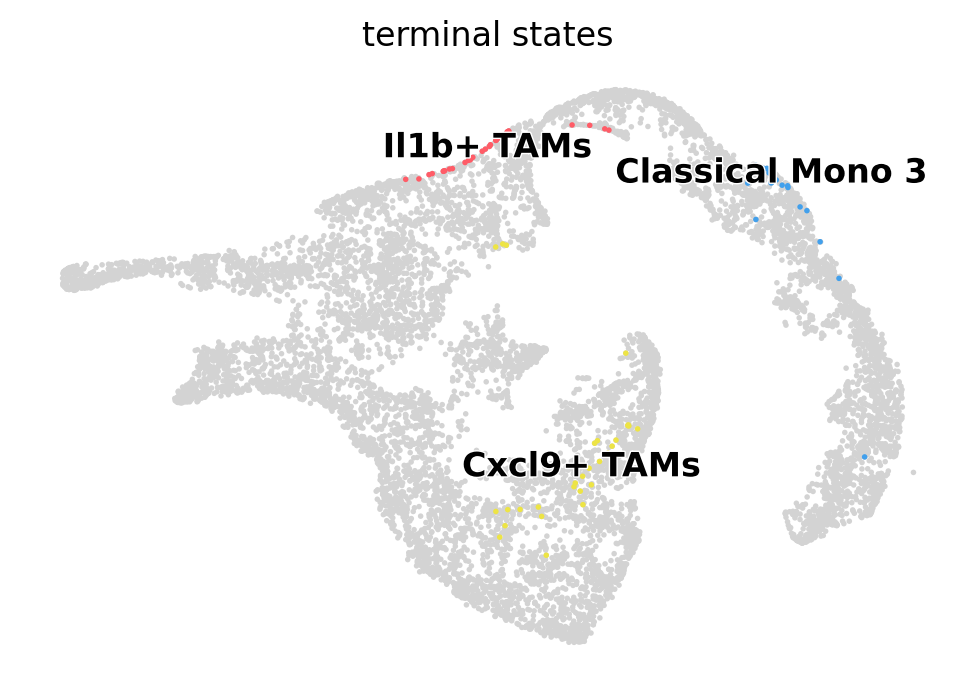

In [35]:
g.plot_macrostates(basis='tsne',discrete=True, save='Macrostates_TSNE.pdf')
g.compute_terminal_states(method="top_n", n_states=3)
g.plot_terminal_states(basis='tsne',same_plot=True,discrete=True, save='All_Terminal_states_TSNE.pdf')

In [36]:
g._set_initial_states_from_macrostates(["Classical_Mono_1"])
g.compute_absorption_probabilities()
g.absorption_probabilities

Adding `adata.obs['initial_states']`
       `adata.obs['initial_states_colors']`

Computing absorption probabilities
Defaulting to `'gmres'` solver.


100%|█████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  4.07/s]

Adding `adata.obsm['to_terminal_states']`
       `.absorption_probabilities`
    Finish (0:00:00)


Il1b+ TAMs,Classical_Mono_3,Cxcl9+ TAMs
0.452258,0.116617,0.431118
0.443630,0.117643,0.438719
0.466608,0.123654,0.409731
0.252734,0.516826,0.230436
0.482236,0.118923,0.398834
0.455917,0.117428,0.426647
0.450638,0.116550,0.432804
0.445715,0.122444,0.431834
0.496242,0.120051,0.383700
0.423911,0.173085,0.402997


In [40]:
Il1b_abs = g.absorption_probabilities['Il1b+ TAMs']
Il1b_abs
ad.obs['Il1b_absorption_prob'] = Il1b_abs
Il1b_abs

Il1b+ TAMs
0.452258
0.443630
0.466608
0.252734
0.482236
0.455917
0.450638
0.445715
0.496242
0.423911


In [42]:
Il1b_drivers = g.compute_lineage_drivers(lineages="Il1b+ TAMs", cluster_key = 'cluster', clusters = 'Classical_Mono', method='perm_test',n_perms=1000,seed=123)

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:15<00:00, 13.27permutation/s]

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:01:15)


KeyError: 'Il1b+_TAMs corr'

In [43]:
Il1b_drivers

,Il1b+ TAMs_corr,Il1b+ TAMs_pval,Il1b+ TAMs_qval,Il1b+ TAMs_ci_low,Il1b+ TAMs_ci_high
Cxcl2,0.714181,0.0,0.0,0.694291,0.733801
Il1b,0.713532,0.0,0.0,0.691437,0.735396
Ptgs2,0.704216,0.0,0.0,0.683842,0.724605
Ier3,0.695196,0.0,0.0,0.670457,0.718792
Junb,0.681531,0.0,0.0,0.656904,0.705535
...,...,...,...,...,...
Majin,NaN,0.0,0.0,NaN,NaN
Cldn11,NaN,0.0,0.0,NaN,NaN
Gabbr2,NaN,0.0,0.0,NaN,NaN
Wee2,NaN,0.0,0.0,NaN,NaN


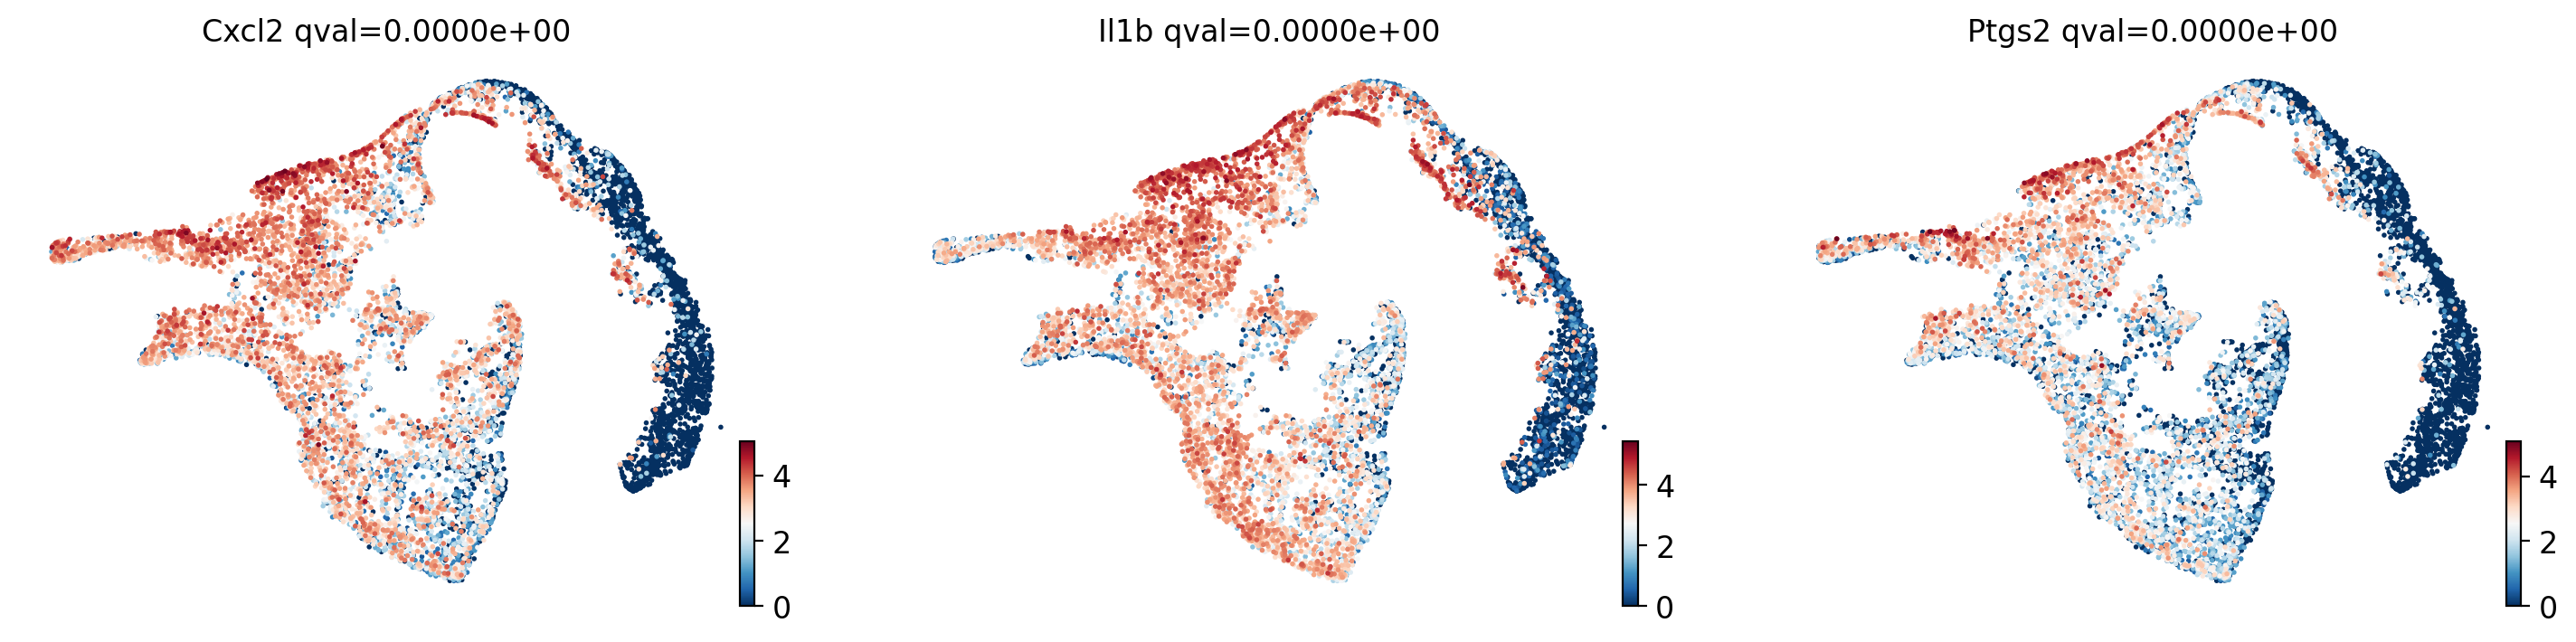

In [48]:
Il1b_drivers.sort_values(by="Il1b+ TAMs_corr", ascending=False)
g.plot_lineage_drivers("Il1b+ TAMs", basis='tsne', n_genes=3, save='Top3_genedrivers_Cl.Mono_to_Il1b_TSNE.pdf')

In [49]:
Il1b_drivers.to_csv('TAM_Il1b_lineage_drivers.csv')